In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('all_4000_posts.csv')

In [3]:
df.drop(columns="Unnamed: 0", inplace=True)

In [4]:
df['selftext'] = df['selftext'].fillna('')


In [5]:
# df['selftext'].value_counts()

In [6]:
(df['selftext'] == '[removed]').sum()

683

In [7]:
(df['selftext'] == '[deleted]').sum()

40

In [10]:
# df['selftext'] = (df['selftext']).replace('[removed]', '')

In [8]:
# df['selftext'] = (df['selftext']).replace('[deleted]', '')

In [8]:
df['title_and_st'] = df['title'] + df['selftext']

In [9]:
df.duplicated(subset=None, keep='first').sum()

0

In [35]:
df.drop_duplicates('selftext')

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,...,crosspost_parent_list,suggested_sort,author_flair_template_id,is_gallery,link_flair_css_class,gallery_data,media_metadata,title_and_st,post_length,word_count
0,[],False,Maxcactus,NaN,[],NaN,text,t2_1vwn,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trump Likes MyPillow Guy’s Plan to Melt Down V...,60,10
2,[],False,Top-Tangerine-1192,NaN,[],NaN,text,t2_6lg34km1,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I need help[removed],20,3
3,[],False,SpeeedyDelivery,NaN,[],NaN,text,t2_5x1pyqz4,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Does ANY other judge ANYWHERE refuse to let la...,173,27
20,[],False,Backup_accout_4jj,NaN,[],NaN,text,t2_cu9re3dn,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Question for the anti gunners/ “you can own gu...,546,97
55,[],False,Tall-Tree12,NaN,[],NaN,text,t2_62f3bl3w,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,So What if Biden Called Satchel Paige a “Great...,104,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,[],False,NORDLAN,NaN,[],NaN,text,t2_2nl9hjok,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The purpose of a political party""If a politica...",319,56
1985,[],False,Drew_911,NaN,[],NaN,text,t2_328ysgx0,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trump s not a racistDespite what all liberals ...,684,117
2710,[],False,Donlorenzo_23,NaN,[],NaN,text,t2_a0v0gnrd,False,False,...,NaN,confidence,NaN,NaN,NaN,NaN,NaN,Lockdowns?With the rising number of 'Rona stor...,209,31
2935,[],False,HOWLING_ABANDON,NaN,[],NaN,text,t2_2aq0g0p2,False,False,...,NaN,confidence,NaN,NaN,NaN,NaN,NaN,Advice needed. Political turmoil in my family....,3693,641


In [10]:
df['subreddit'] = df['subreddit'].map({'Liberal':1, "Conservative":0})

In [11]:
df['post_length'] = df['title_and_st'].apply(len)

In [12]:
df['word_count'] = [len(x.split()) for x in df['title_and_st'].tolist()]

In [13]:
df.groupby('subreddit').mean()

,allow_live_comments,can_mod_post,contest_mode,created_utc,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,...,stickied,subreddit_subscribers,thumbnail_height,thumbnail_width,total_awards_received,upvote_ratio,wls,author_flair_background_color,post_length,word_count
subreddit,,,,,,,,,,,,,,,,,,,,,
0,0.0005,0.0,0.0,1.636980e+09,0.0,0.509755,0.0,0.003502,0.117559,0.509755,...,0.0,881439.464732,91.835848,139.925166,0.0000,0.99930,6.995998,NaN,80.48074,12.69935
1,0.0000,0.0,0.0,1.630233e+09,0.0,0.435000,0.0,0.000000,0.000000,0.435000,...,0.0,108491.727000,85.720986,139.777424,0.0005,0.99559,5.971500,NaN,136.62100,21.48050


In [14]:
X = df['title_and_st']
y = df['subreddit']

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, stratify=y)

In [17]:
# #https://stackoverflow.com/questions/5511708/adding-words-to-nltk-stoplist
# import nltk

# stopwords = nltk.corpus.stopwords.words('english')
# stopwords.append('removed')
# stopwords.append('deleted')

In [22]:
tvec = TfidfVectorizer(stop_words='english', binary=True, max_df=.2, min_df=1, max_features=4000, 
                      ngram_range=(1,2))


In [23]:
X_train_vec = tvec.fit_transform(X_train)

In [24]:
X_val_vec = tvec.transform(X_val)

In [50]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import StandardScaler
# knn_pipe = Pipeline([
#     ('ss', StandardScaler(with_mean=False)),
#     ('knn', KNeighborsClassifier())
# ])

In [29]:
vote = VotingClassifier([
#     ('ada',AdaBoostClassifier(base_estimator=DecisionTreeClassifier())),
#     ('gb', GradientBoostingClassifier()),
#     ('rt', RandomForestClassifier()),
    ('log', LogisticRegression()),
#     ('knn_pipe', knn_pipe),
#     ('tree', DecisionTreeClassifier())
])
params = {
#     'gb__n_estimators': [200],
#     'ada__base_estimator__max_depth': [1, 2, 3],
#     'rt__n_estimators':[200],
    'log__penalty':['l2'],
    'log__C': [.85],
    'log__max_iter': [30],
#     'knn_pipe__knn__n_neighbors': [3, 4, 5, 6]
#     'tree__max_depth': [2,3,5,7],
#     'tree__min_samples_split':[5, 10, 15, 20],
#     'tree__min_samples_leaf':[2, 3, 4, 5, 6],
#     'tree__ccp_alpha':[0, 0.001, 0.01, 0.1, 1, 10]
    
}

gs = GridSearchCV(vote, param_grid=params)
gs.fit(X_train_vec, y_train)
print(gs.best_score_)
gs.best_params_

0.7592554257095159


{'log__C': 0.85, 'log__max_iter': 30, 'log__penalty': 'l2'}

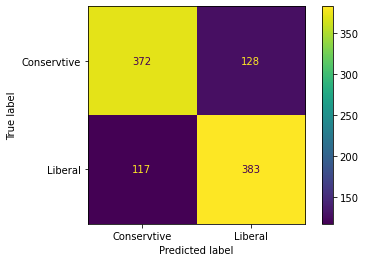

In [30]:
plot_confusion_matrix(gs, X_val_vec, y_val, display_labels=['Conservtive', 'Liberal']);

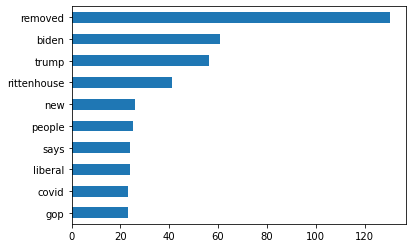

In [34]:
# convert training data to dataframe
X_train_df = pd.DataFrame(tvec.fit_transform(X_train).todense(), 
                          columns=tvec.get_feature_names())

# plot top occuring words
X_train_df.sum().sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh');